In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('forest_updated1')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


#### Observation- As year doesnt possess any distribution , hence we can remove year column

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

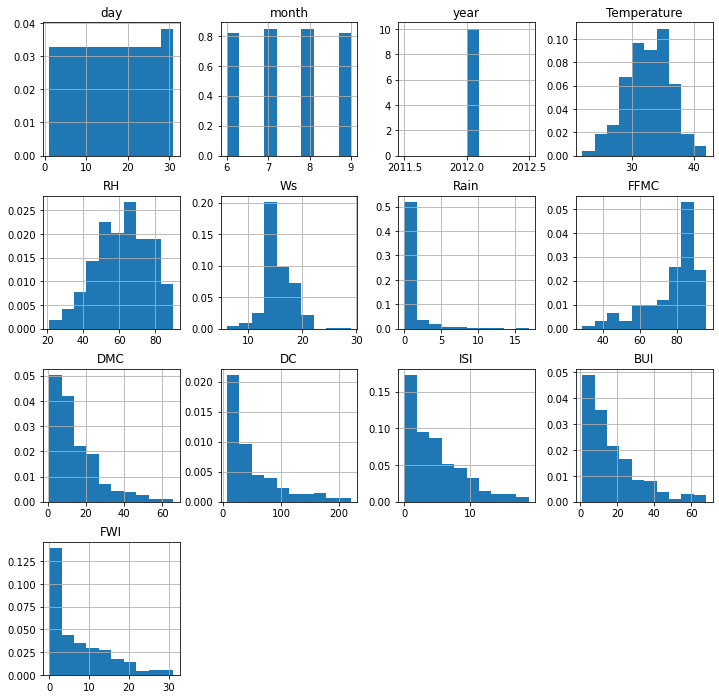

In [3]:
df.hist(density=True, figsize=(12,12))

#### Observation : 'Temperature' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

In [4]:
df.reset_index(drop=True)

df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'classes'],
      dtype='object')

<BarContainer object of 2 artists>

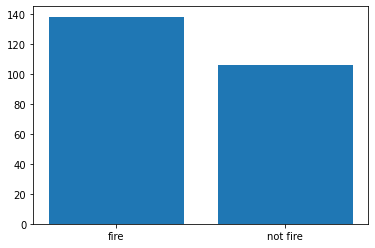

In [5]:
classes = df.groupby(['classes'])['classes'].count()
plt.bar(classes.index, classes)

#### Observation- Our dependent variable classes has balance dataset

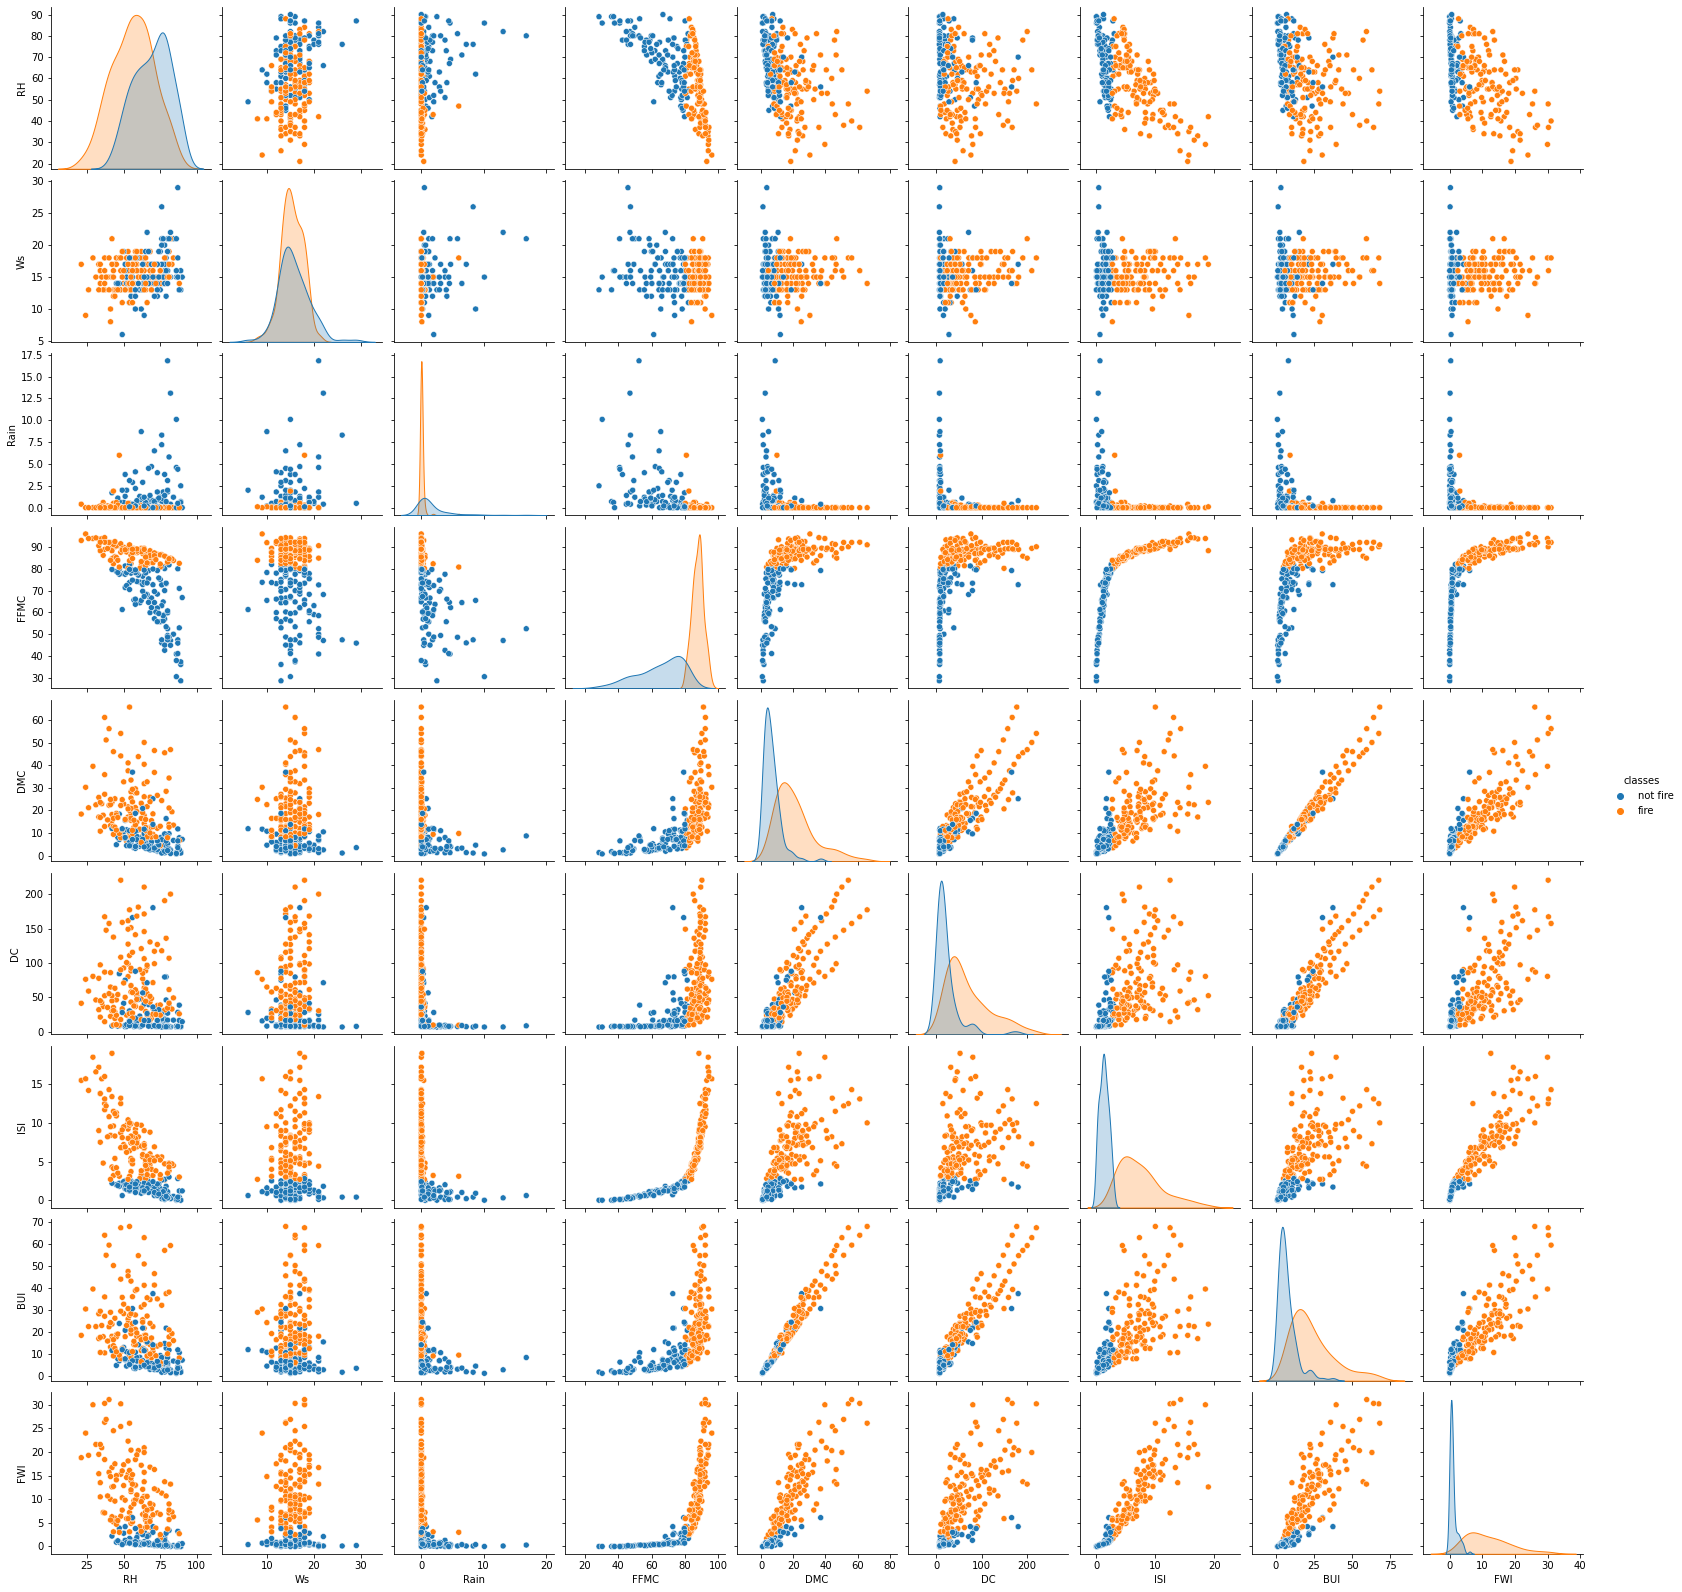

In [6]:
sns.pairplot(df.drop(columns=['day', 'month', 'year', 'Temperature']),hue='classes')

#### Observation- Many features are showing -ve correaltion with dependent variable , So we can remove them to increase accuracy of our model

In [7]:
# What is highest temperature
df['Temperature'].max()

42

In [8]:
# What is lowest temperature
df['Temperature'].min()

22

In [9]:
#When did it rain the most?
df.sort_values(by='Rain',ascending=False).head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
91,31,8,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire


In [10]:
##When did it rain the least?
df.sort_values(by='Rain').head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire


In [11]:
# What month is the hottest
df.sort_values(by='Temperature', ascending=False).head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
199,17,8,2012,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,fire


In [12]:
df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [13]:
df['classes'].value_counts()/len(df)

fire        0.565574
not fire    0.434426
Name: classes, dtype: float64

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'classes'],
      dtype='object')

In [15]:
df.groupby(['month','classes'])['classes'].count()

month  classes 
6      fire        25
       not fire    35
7      fire        39
       not fire    23
8      fire        51
       not fire    11
9      fire        23
       not fire    37
Name: classes, dtype: int64

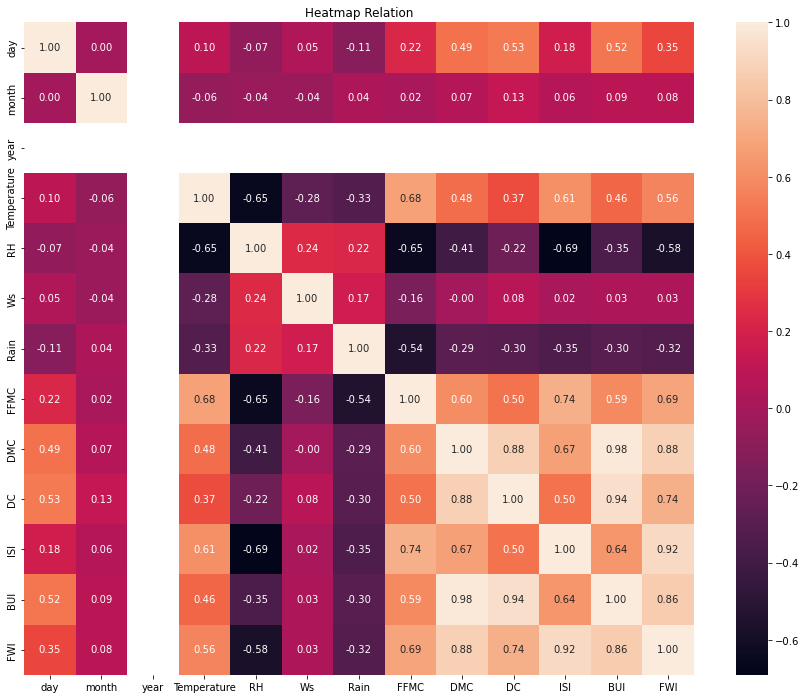

In [16]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(df.corr(), annot=True, fmt='.2f');

#### Observation - As we can see in this heatmap, The lighter color shows the higher cor-relation betweem two variables and the darker color has less relation ship.

In [17]:
df.corr()['Temperature']

day            0.095772
month         -0.059017
year                NaN
Temperature    1.000000
RH            -0.654443
Ws            -0.278132
Rain          -0.326786
FFMC           0.677491
DMC            0.483105
DC             0.370511
ISI            0.607551
BUI            0.455504
FWI            0.564647
Name: Temperature, dtype: float64

In [18]:
## FFMC and ISI has especially higher correlation with dependent var temperature

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

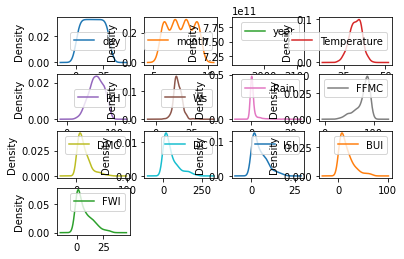

In [18]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

<AxesSubplot:xlabel='Rain', ylabel='Density'>

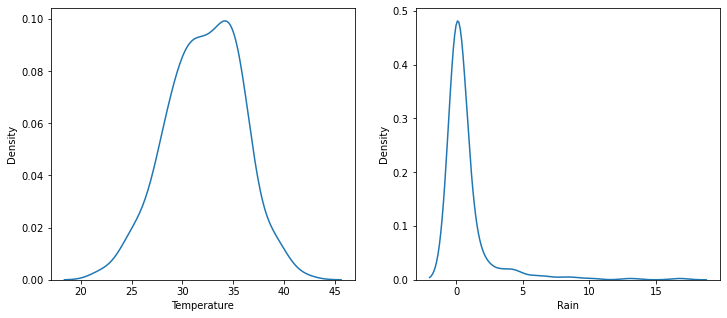

In [19]:
fig ,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scalling
sns.kdeplot(df['Temperature'], ax=ax1)
sns.kdeplot(df['Rain'], ax=ax2)

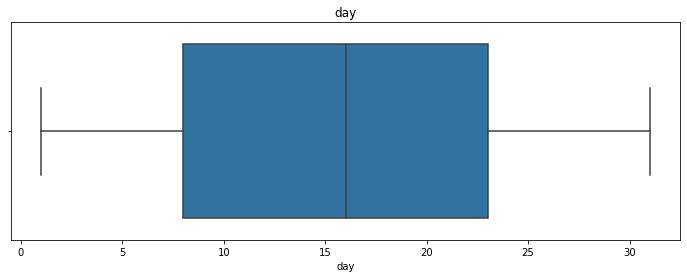

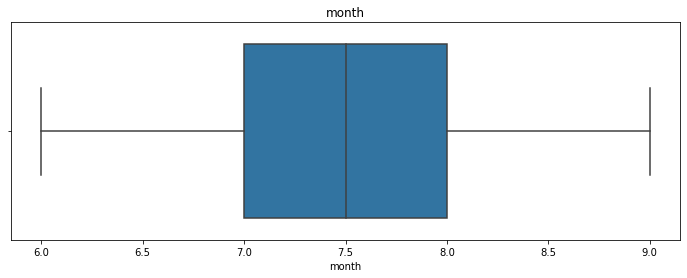

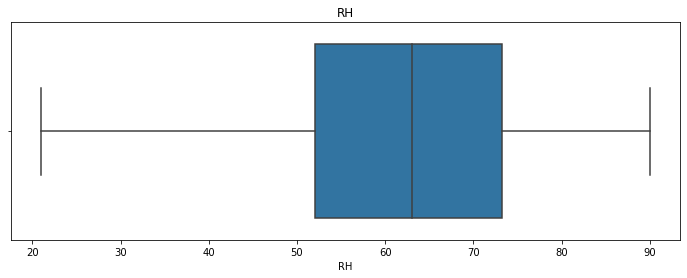

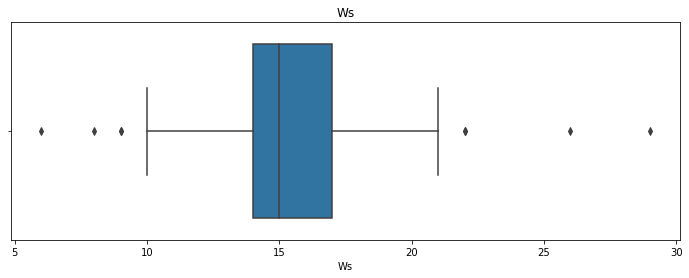

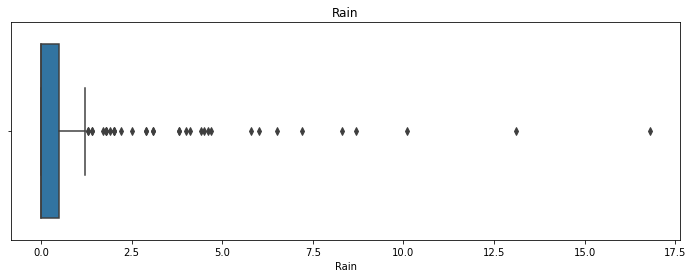

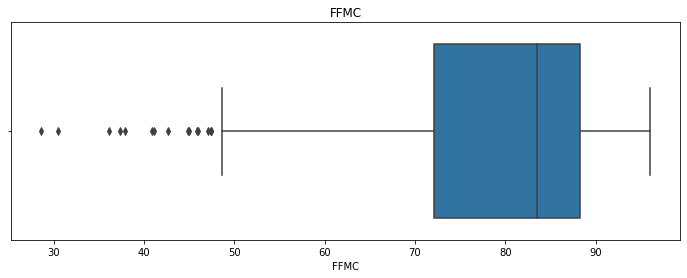

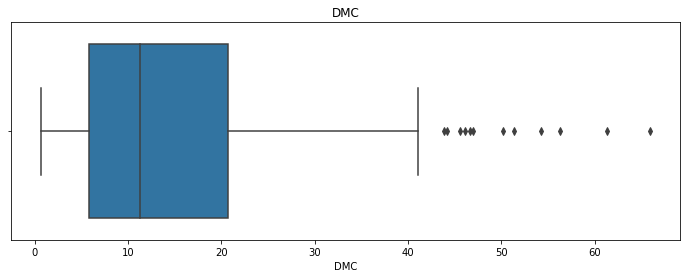

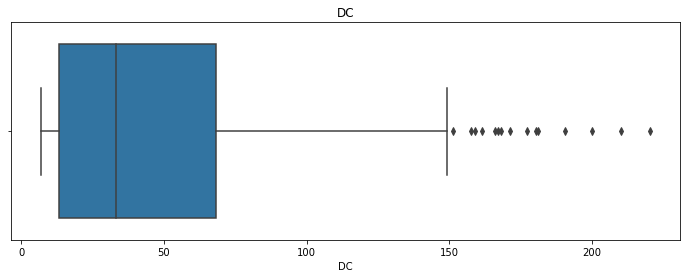

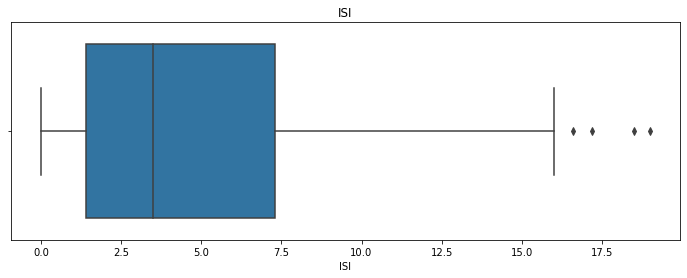

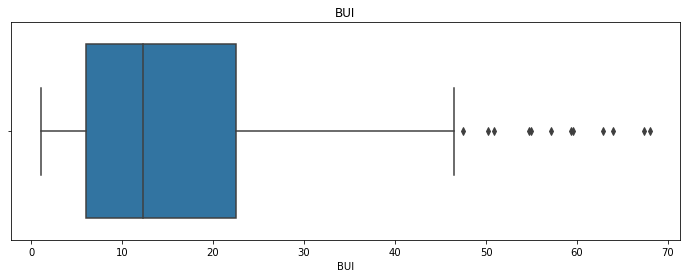

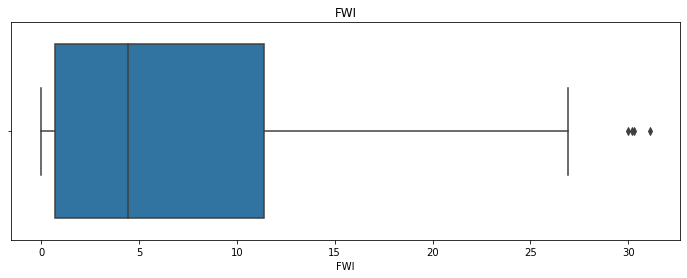

In [28]:
X = df.drop(columns=['Temperature','year','classes'],axis=1)
y = df['Temperature']
X.columns
for col in X.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(X[col])
    plt.title(col)

#### Observation- Outliers are there in our data

In [21]:
X.columns

Index(['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [22]:
df1= df.copy()

In [23]:
pd.get_dummies(df1, columns=['classes'],drop_first=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [24]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After' + str(t))

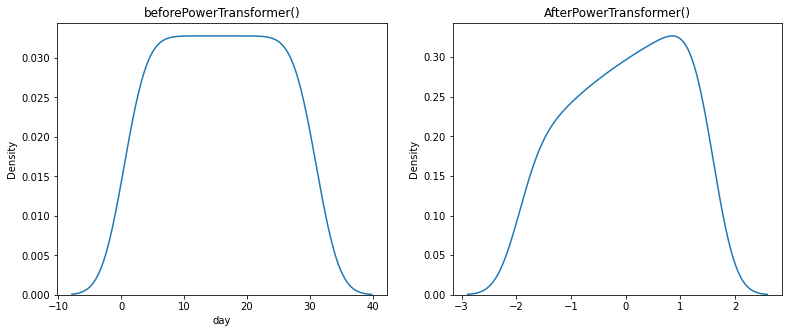

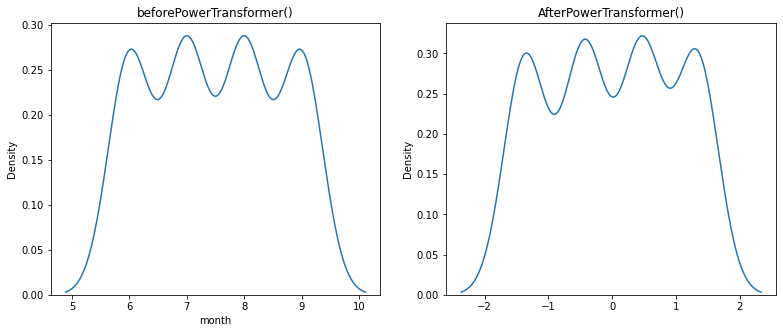

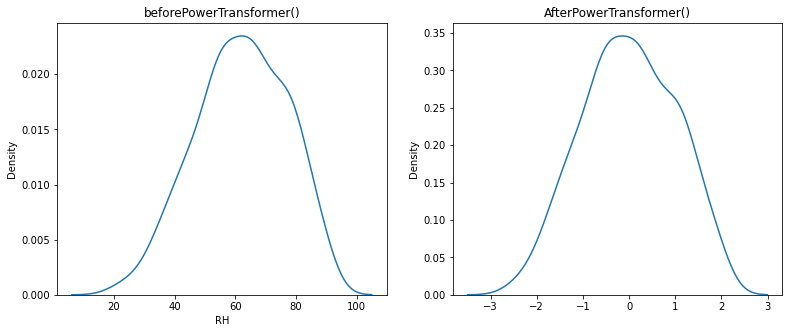

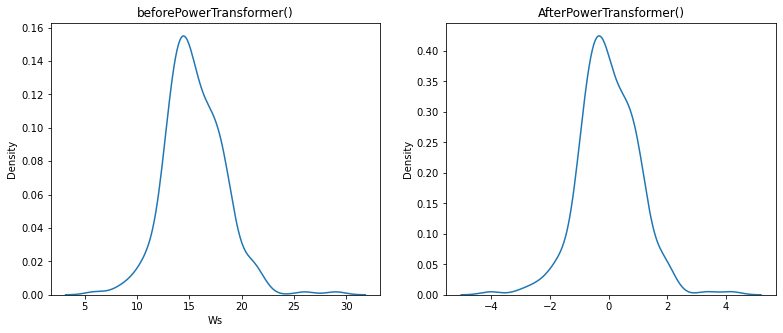

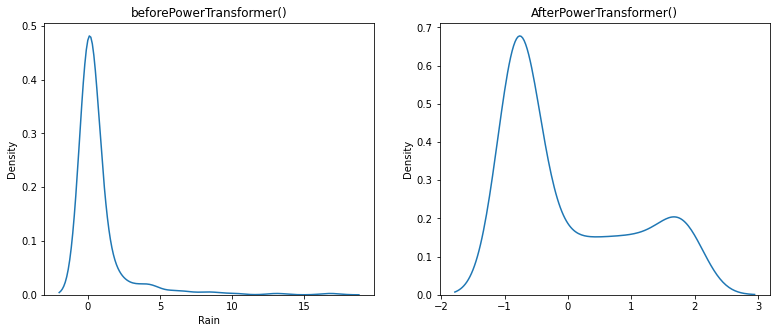

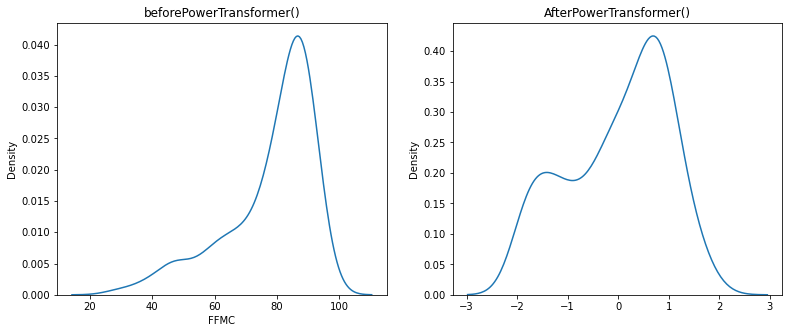

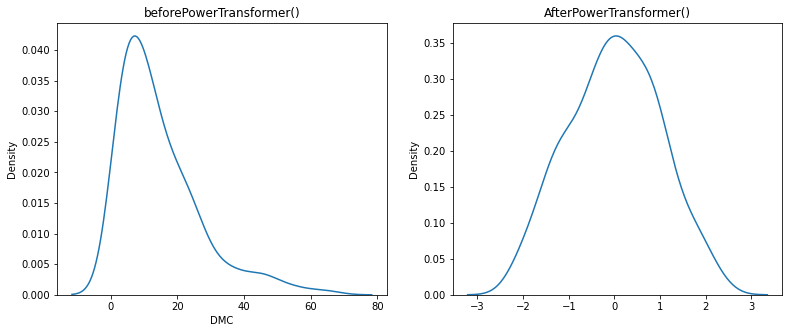

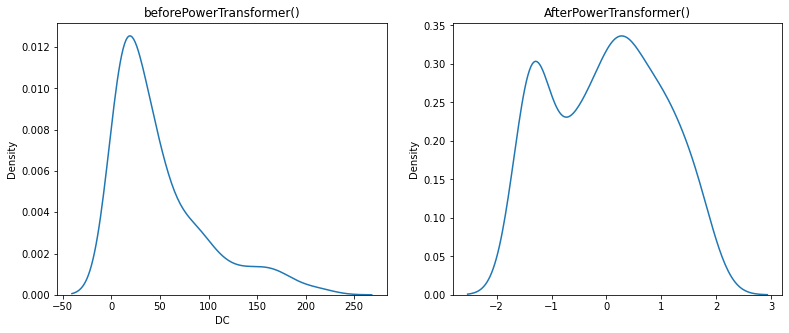

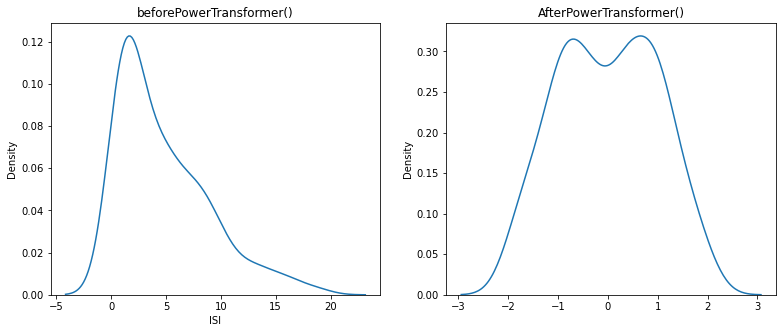

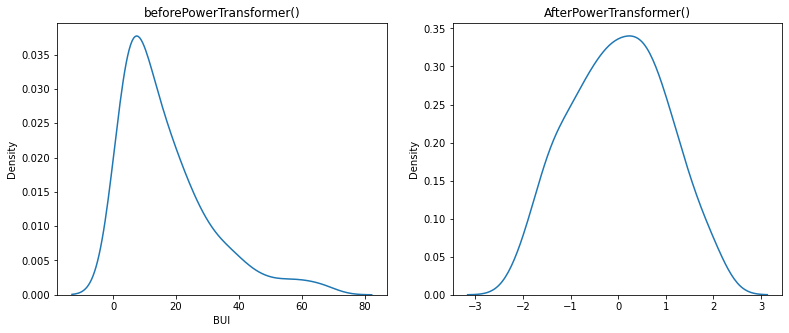

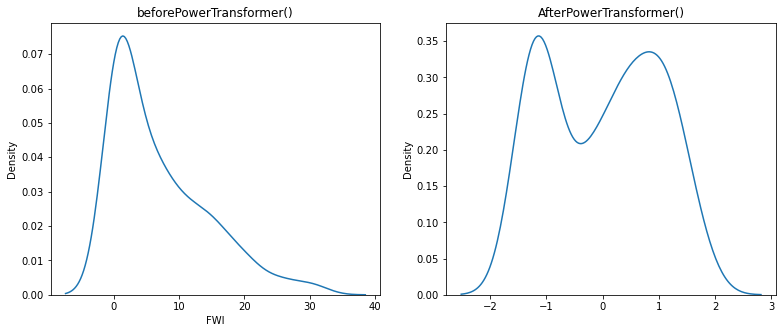

In [25]:

for col in ['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    plots(X,col,PowerTransformer())
    

<AxesSubplot:xlabel='RH', ylabel='Density'>

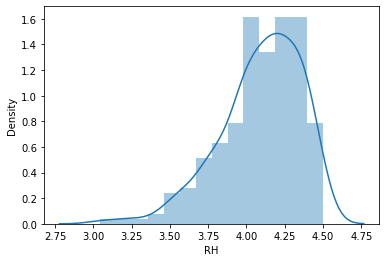

In [26]:
sns.distplot(np.log(df['RH']))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=2)

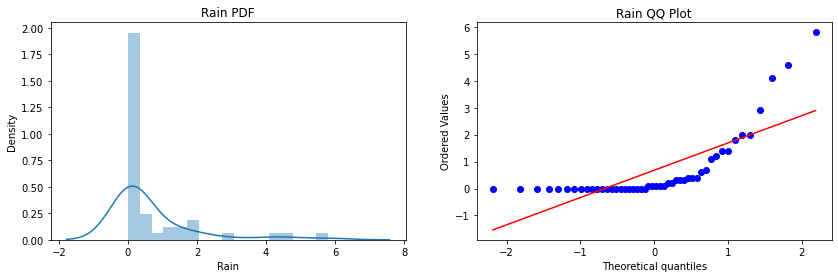

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Rain'])
plt.title('Rain PDF')

plt.subplot(122)
stats.probplot(X_train['Rain'], dist="norm", plot=plt)
plt.title('Rain QQ Plot')

plt.show()

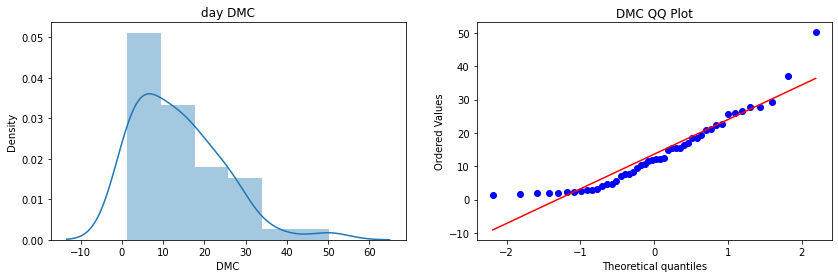

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['DMC'])
plt.title('day DMC')

plt.subplot(122)
stats.probplot(X_train['DMC'], dist="norm", plot=plt)
plt.title('DMC QQ Plot')

plt.show()

<AxesSubplot:xlabel='RH', ylabel='Density'>

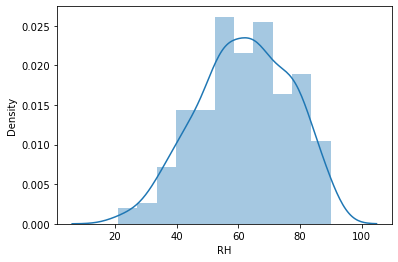

In [32]:
sns.distplot(df['RH'])

In [33]:
df['Ws'].unique()

array([18, 13, 22, 16, 14, 15, 12, 19, 21, 20, 17, 26, 11, 10,  9,  8,  6,
       29])

<AxesSubplot:xlabel='Ws', ylabel='Density'>

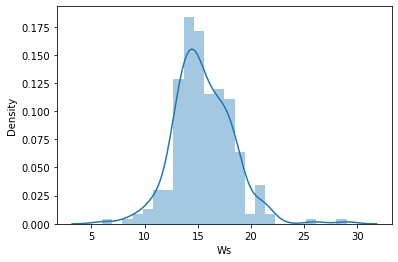

In [34]:
sns.distplot(df['Ws'])

<AxesSubplot:xlabel='Ws', ylabel='Density'>

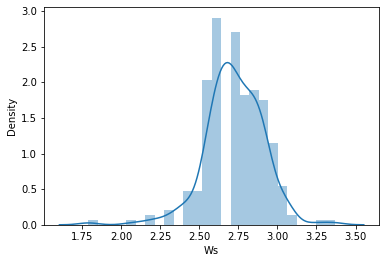

In [35]:
sns.distplot(np.log(df['Ws']))

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

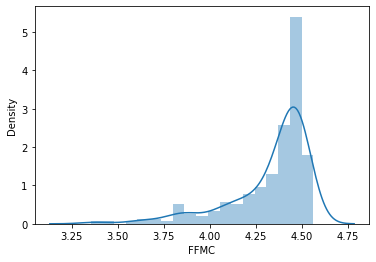

In [36]:
sns.distplot(np.log(df['FFMC']))

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

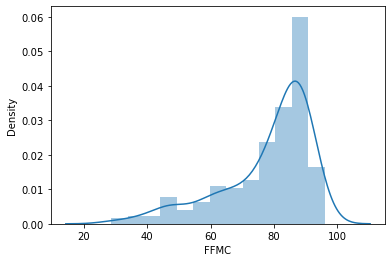

In [37]:
sns.distplot(df['FFMC'])

<AxesSubplot:xlabel='DMC', ylabel='Density'>

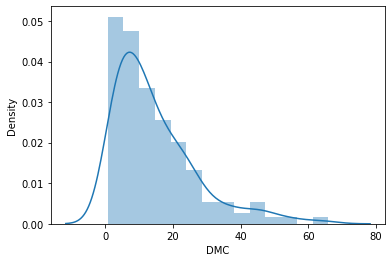

In [38]:
sns.distplot(df['DMC'])

<AxesSubplot:xlabel='DMC', ylabel='Density'>

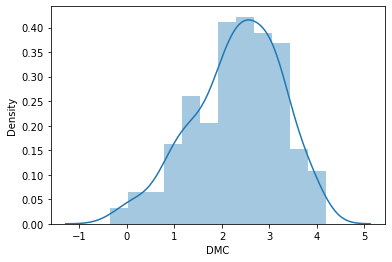

In [39]:
sns.distplot(np.log(df['DMC']))

<AxesSubplot:xlabel='DC', ylabel='Density'>

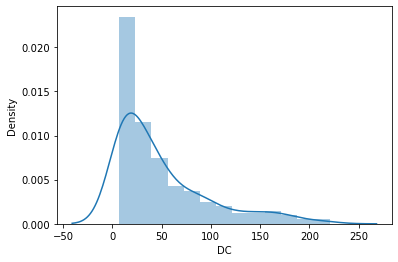

In [40]:
sns.distplot(df['DC'])

<AxesSubplot:xlabel='DC', ylabel='Density'>

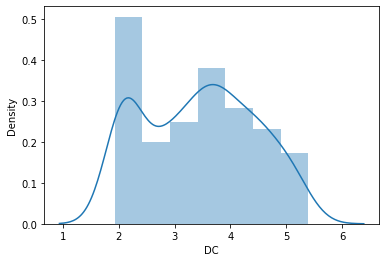

In [41]:
sns.distplot(np.log(df['DC']))

In [42]:
df['BUI'].unique()

array([ 3.4,  3.9,  2.7,  1.7,  7. , 10.9, 13.5, 10.5, 12.6, 15.8, 17.7,
        6.7,  4.4,  3. ,  2.2,  1.6,  2.4,  5.3,  5.1,  8.4,  9.7, 11.5,
       14.9, 18.3, 21.6, 25.8, 29.7, 23.8, 28.3,  2.9,  2.8,  5.7,  9.1,
       12.5, 12.1, 15.4,  7.4,  5.8,  8.1,  9.2, 11.7,  5.9,  8.3, 11.1,
       14.2, 18.2, 16.5, 22.4, 21.7, 14.7, 18.5, 23.9, 29.4, 32.1, 35. ,
       37.4, 41.2,  4.7,  5.5,  8.2, 17.2, 14.1, 17.9, 21.9, 25.5, 20.7,
       24.4, 27.2, 22. , 17.6, 22.9, 27.5, 31.3, 34.7, 38.8, 43.1, 47.5,
       50.9, 54.7, 57.1, 59.3, 62.9, 67.4,  1.8,  1.1,  5.6,  2.6,  3.7,
        1.4,  4.2,  7.7, 11.3, 16. , 19.2, 12.9,  9.6,  6.2,  9. ,  6.8,
        6.5,  9.3, 10.7,  7.3, 13.1, 18. , 21.2,  6.1,  7.1,  4.1,  3.8,
        9.9, 12.7, 16.4, 20.8, 27.1, 17.8,  3.3,  7.8, 10.3, 18.7, 16.7,
       13.7,  9.4, 10.4, 20.9, 27.7, 32.6, 39.5, 44. , 46.5, 11.4, 11.8,
       15.7, 19.5, 10.6, 16.9, 23.5,  6.9, 11. , 18.4, 17.5, 22.3, 19. ,
       24.2, 30.4, 35.9, 35.5, 38.1, 41.3, 45.5, 50

<AxesSubplot:xlabel='BUI', ylabel='Density'>

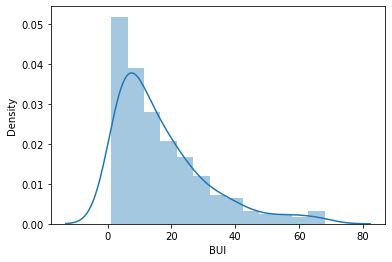

In [43]:
sns.distplot(df['BUI'])

<AxesSubplot:xlabel='BUI', ylabel='Density'>

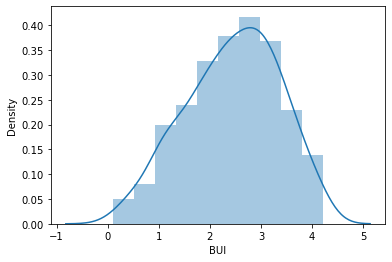

In [44]:
sns.distplot(np.log(df['BUI']))

In [45]:
df['FWI'].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7, 14.1,  9.1,
       13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6, 12.7,
       21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5, 26.9,
       31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8, 19.3,
       17.5, 15.4, 15.2,  6.5])